Two degrees of freedom model

The equations of motion are:

$\quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = 0$

$\quad m_2 \ddot{x}_2 - k_2 x_1 + (k_2 + k_3)x_2 = 0$

Also expressed in matrix form as:

$\quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} +  \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$


Free vibration analysis solving the eigenvalue problem to get natural frequencies and modes, then solve numerically the equations of motion

In [10]:
import numpy as np                        # Import NumPy functions with as np
from scipy.integrate import odeint        # Import odeint for numerical integration of ODEs
from scipy import linalg                  # Import module for linear algebra
# Display plots inline
%matplotlib inline 
import matplotlib.pyplot as plt

To obtain the natural frequencies and mode shapes consider harmonic motion to state the frequency equation as:

$\quad \left[K - \omega^2 M\right]\bar{X} = 0$

To solve it as an egienvalue problem, where the eigenvalues are the natural frequencies and the eigenvector are the mode shapes.


In [34]:
# Define the system parameters
# Example defines k1, k2, k3 to give the first natural frequency at 1 Hz
m1 = 1.0                # kg
m2 = 1.0                # kg
k1 = (2 * np.pi)**2     # N/m 
k2 = (2 * np.pi)**2     # N/m 
k3 = (2 * np.pi)**2     # N/m 

In [43]:
# Define the mass and stiffness matrices
M = np.asarray([[m1, 0],
                [0,  m2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2 + k3]])

In [46]:
omega_square, Modal_B = linalg.eigh(K, M)
# The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. 
# The eigenvalues are the square of the two natural frequencies. 
# The eigenvectors are returned mass normalised.

print('\n')
print('\n')
print('The natural frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(omega_square[0]), np.sqrt(omega_square[1])))
print('\n')

print('The modal matrix B is:')
def printArray(Modal_B):
    for row in Modal_B:
        for col in row:
            print("{:8.3f}".format(col), end=" ")
        print("")
printArray(Modal_B)






The natural frequencies are 6.28rad/s and 10.88rad/s.


The modal matrix B is:
  -0.707   -0.707 
  -0.707    0.707 


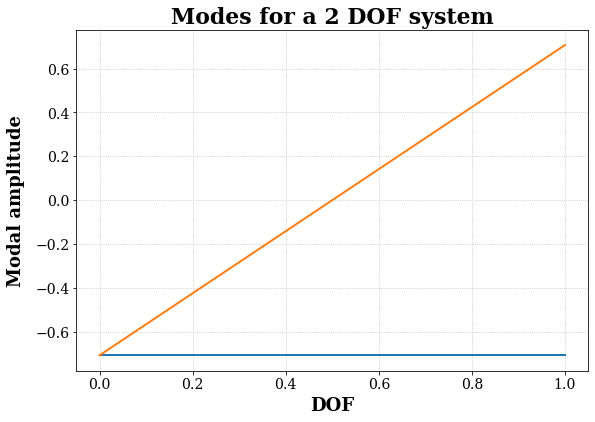

In [49]:
# Plot the modes

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('DOF', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Modal amplitude', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("Modes for a 2 DOF system",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(Modal_B[:,0],linewidth=2,label=r'Mode 1')
plt.plot(Modal_B[:,1],linewidth=2,label=r'Mode 2')

# uncomment below and set limits if needed

In [54]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 5.0
numpoints = 5001

# Define time vector for the solver
t = np.linspace(0.0, stoptime, numpoints)

In [55]:
# Set the equations of motion as a system of first order equations. i.e. state space form
def eq_of_motion(w, t, p):
    """
    Defines the ODEs for the two DOF model.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, k3]
    """
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, k3 = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot'):
    sysODE = [x1_dot,
             (-(k1 + k2) * x1 + k2 * x2) / m1,
             x2_dot,
             (k2 * x1 - (k2 + k3) * x2) / m2]
              
    return sysODE

Plot the response when the initial conditions excite only the first mode, i.e.

$\quad x_1(0) = x_0$ and $x_2(0) = x_0$

In [56]:
# Set up Initial Conditions and call ODEINT solver
# Note initial conditions x1_dot_init = 0.0 and x2_dot_init = 0.0
# Along with equal ID of 0.5 for DOF´s 1 and 2 induces the first mode at free vibration

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# State the parameters as arrays
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Apply ODE solver
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

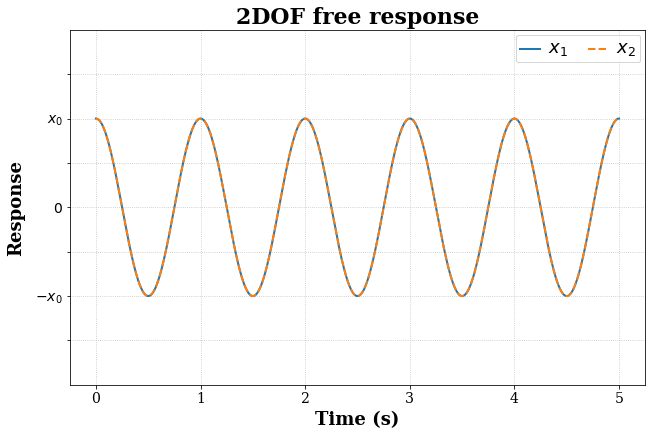

In [57]:
# Plot results

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Response', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("2DOF free response",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Add legend
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout 
plt.tight_layout(pad=0.5)


fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Plot the response when the initial conditions excite only the second mode, i.e.

$\quad x_1(0) = x_0$ and $x_2(0) = -x_0$

In [58]:
# Set up Initial Conditions and call ODEINT solver
# Note initial conditions x1_dot_init = 0.0 and x2_dot_init = 0.0
# Along with ID of 0.5 for DOF 1 and -0.5 for DOF 2 induces the first second mode at free vibration

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = -0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# State the parameters as arrays
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Apply ODE solver
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

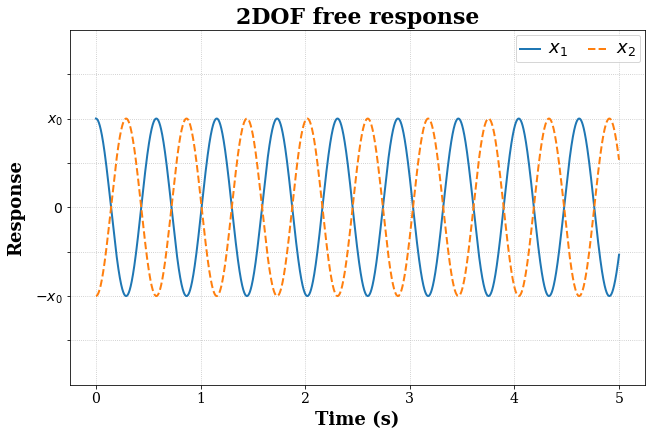

In [59]:
# Plot results

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Response', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("2DOF free response",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Add legend
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout 
plt.tight_layout(pad=0.5)


fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Now lets try any oter combination of IC to get contribution from mode 1 and mode 2 in the free response

In [60]:
# Set up Initial Conditions and call ODEINT solver
# Note initial conditions x1_dot_init = 0.0 and x2_dot_init = 0.0
# Along with ID of 0.5 for DOF 1 and -0.5 for DOF 2 induces the first second mode at free vibration

# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.0                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity

# State the parameters as arrays
p = [m1, m2, k1, k2, k3]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

# Apply ODE solver
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

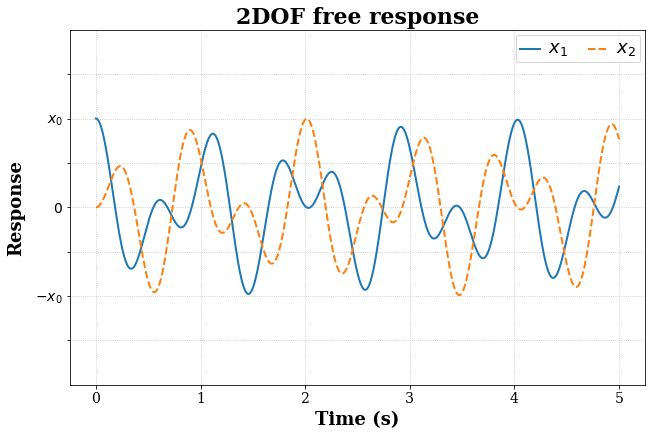

In [61]:
# Plot results

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Response', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("2DOF free response",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1)
plt.yticks([-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75], ['', '$-x_0$', '', '$0$', '', '$x_0$', ''])

# Add legend
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout 
plt.tight_layout(pad=0.5)


fig.set_size_inches(9,6) # Resize the figure for better display in the notebook